In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/SupervisedML/BodyPerformanceData/

Mounted at /gdrive
/gdrive/MyDrive/SupervisedML/BodyPerformanceData


# Import Data

Data from Kaggle dataset. Measurements from body performance with target class of group of people. Goal of supervised learning is to learn the relationships of these classes and classify new observations (testing set).


https://www.kaggle.com/datasets/kukuroo3/body-performance-data

In [2]:
# Preprocessing packages
import numpy as np 
from numpy import set_printoptions
import pandas as pd 

# Data Viz packages
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn preprocessing and metrics packages
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

# Sklearn feature selection packages
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# Sklearn model selection packages
from sklearn import tree
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Neural network packages
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from tensorflow.keras.optimizers import SGD

In [3]:
# Data from: https://www.kaggle.com/datasets/kukuroo3/body-performance-data
data = pd.read_csv('BodyPerformance.csv')
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


# Data Preprocessing

In [4]:
# Rename target col
data["category"] = data["class"].copy()
data = data.drop(columns='class')

print(f'Data shape: \n{data.shape}\n')
print(f'Features: \n{data.columns.to_list()}\n')
print(f'Target (category of people): \n{np.unique(data.category)}')

Data shape: 
(13393, 12)

Features: 
['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm', 'category']

Target (category of people): 
['A' 'B' 'C' 'D']


In [ ]:
pie_df = data[['category', 'gender']]
pie_df = pie_df.groupby(['category', 'gender']).size().reset_index()

pie_arr = pie_df.to_numpy()
pie_df

,category,gender,0
0,A,F,1484
1,A,M,1864
2,B,F,1185
3,B,M,2162
4,C,F,1112
5,C,M,2237
6,D,F,1145
7,D,M,2204


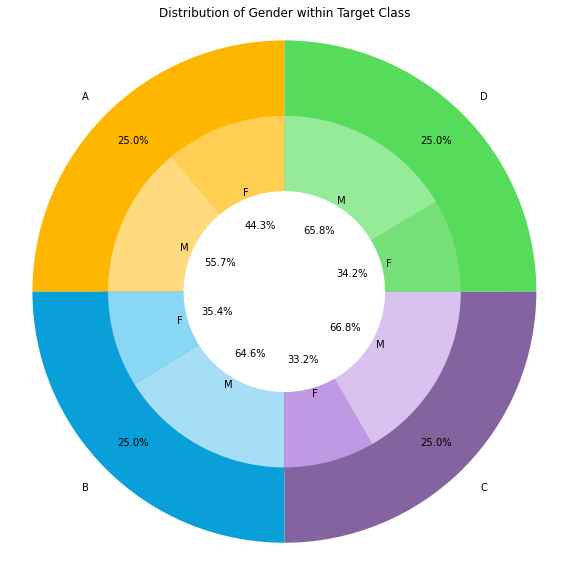

In [ ]:
plt.figure(figsize=(8, 8)) # change the size of a figure

labels = np.unique(pie_arr[:,0])
sizes = data["category"].value_counts()
colors = ['#FFB600', '#09A0DA','#8464a0', '#56DB5A']

# labels_subgroup = np.unique(pie_arr[:,1])
labels_subgroup = ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M']
sizes_subgroup = (pie_arr[:,2] / 3348)
colors_subgroup = ['#FFCE53', '#FFDA7E', 
                   '#89D7F5', '#A6DFF5',
                   '#C098E3', '#DAC2F0',
                   '#75E078', '#96EB99']
 
outside_donut = plt.pie(sizes, labels=labels, colors=colors,
                        startangle=90, frame=True,
                        autopct='%.1f%%',
                        pctdistance =0.85)

inside_donut = plt.pie(sizes_subgroup, labels=labels_subgroup,
                        colors=colors_subgroup, radius=0.7,
                        startangle=90, labeldistance=0.6,
                        autopct=lambda p: '{:.1f}%'.format(p * 4),
                        shadow=True,
                        pctdistance =0.4)

centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# displaying the title
plt.title("Distribution of Gender within Target Class")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
# Check for null values

data_null = data.isnull().sum()
data_null

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
category                   0
dtype: int64

# Encode Target and Categorical features

In [ ]:
le = LabelEncoder()

data.category = le.fit_transform(data.category)
data = data.replace({'gender':{'M':0 , 'F':1}})
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,category
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,3
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  int64  
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  category                 13393 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 1.2 MB


# EDA

## Check descriptive statistics of features

In [ ]:
describe = data.describe(exclude=[np.int64, np.object]).T
describe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,count,mean,std,min,25%,50%,75%,max
age,13393.0,36.775106,13.625639,21.0,25.0,32.0,48.0,64.0
height_cm,13393.0,168.559807,8.426583,125.0,162.4,169.2,174.8,193.8
weight_kg,13393.0,67.447316,11.949666,26.3,58.2,67.4,75.3,138.1
body fat_%,13393.0,23.240165,7.256844,3.0,18.0,22.8,28.0,78.4
diastolic,13393.0,78.796842,10.742033,0.0,71.0,79.0,86.0,156.2
systolic,13393.0,130.234817,14.713954,0.0,120.0,130.0,141.0,201.0
gripForce,13393.0,36.963877,10.624864,0.0,27.5,37.9,45.2,70.5
sit and bend forward_cm,13393.0,15.209268,8.456677,-25.0,10.9,16.2,20.7,213.0
sit-ups counts,13393.0,39.771224,14.276698,0.0,30.0,41.0,50.0,80.0
broad jump_cm,13393.0,190.129627,39.868000,0.0,162.0,193.0,221.0,303.0


Check to see if there is uneven distribution in gender among target (category).

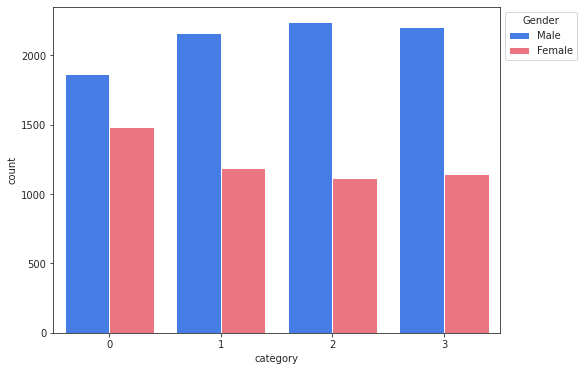

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

sns.countplot(data=data, x="category", hue="gender", palette=['#2b75ff',"#ff6171"])

ax.legend(title='Gender', bbox_to_anchor=(1, 1), labels=['Male', 'Female'])

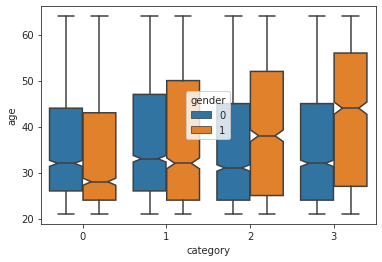

In [ ]:
sns.boxplot(data = data , x = 'category' , y = 'age' , hue = 'gender' , notch = True )


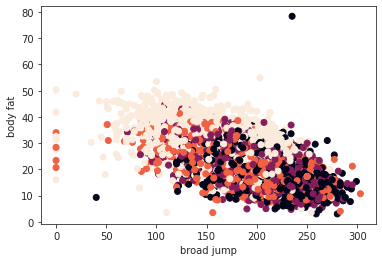

In [ ]:
plt.scatter(x=data['broad jump_cm'], y=data['body fat_%'], c = data.category)
plt.xlabel('broad jump')
plt.ylabel('body fat')
plt.show()

## Correlation of features

In [ ]:
# Create correlation matrix
corr_mat = data.drop(columns='category').corr(method='pearson')

# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values(ascending=False).drop_duplicates()

In [ ]:
# Top 5 positive correlations
positive_corr = sorted_mat[sorted_mat > 0]
positive_corr[0:5]

age             age              1.000000
sit-ups counts  broad jump_cm    0.748273
broad jump_cm   gripForce        0.746853
gripForce       height_cm        0.735024
height_cm       weight_kg        0.734909
dtype: float64

In [ ]:
# Top 5 negative correlations
negative_corr = sorted_mat[sorted_mat < 0].sort_values(ascending=True)
negative_corr[0:5]

gender         gripForce       -0.800184
               height_cm       -0.730899
               broad jump_cm   -0.704149
broad jump_cm  body fat_%      -0.673273
gender         weight_kg       -0.672887
dtype: float64

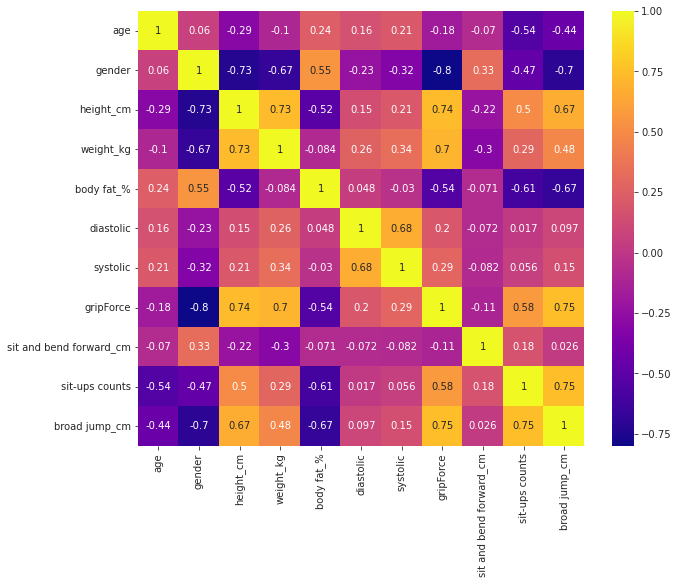

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
corr = sns.heatmap(data.drop(columns='category').corr(), ax=ax, cmap='plasma', annot=True)

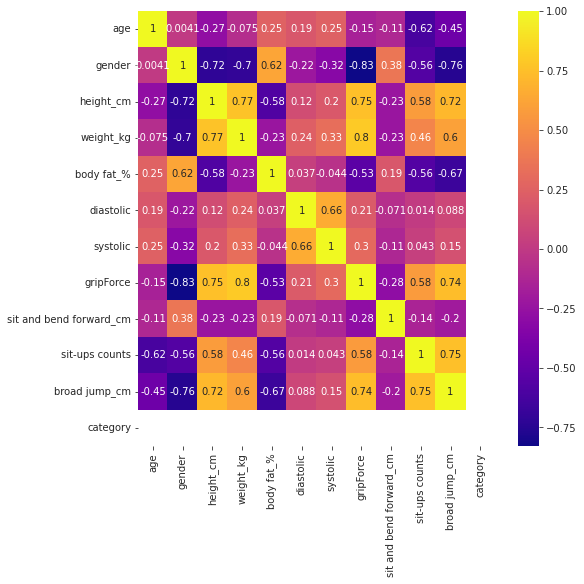

In [ ]:
# Correlation matrix from one target class

cat_0 = data.loc[data['category'] == 0]
cat_1 = data.loc[data['category'] == 1]
cat_2 = data.loc[data['category'] == 2]
cat_3 = data.loc[data['category'] == 3]

fig, ax = plt.subplots(figsize=(10,8))
corr = sns.heatmap(cat_1.corr(), ax=ax, cmap='plasma', annot=True)

Text(0.5, 1.0, 'Features Correlating with Sales Price')

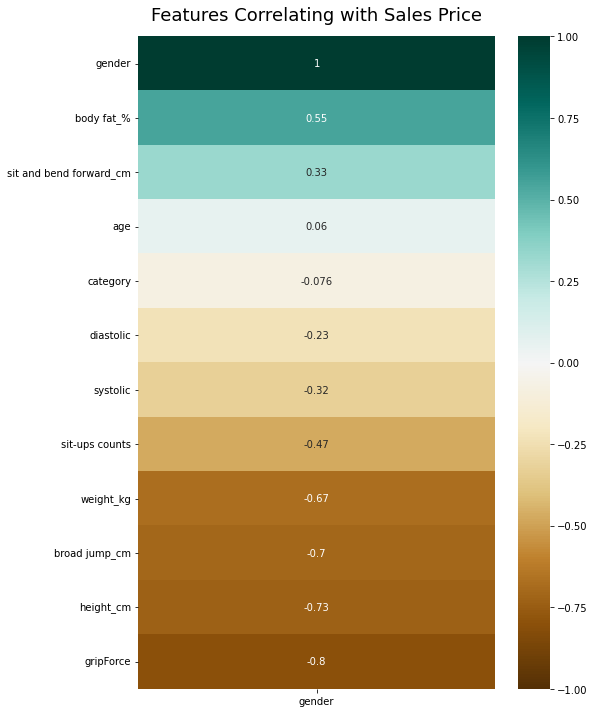

In [ ]:
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(data.corr()[['gender']].sort_values(by='gender', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with Sales Price', 
                  fontdict={'fontsize':18}, pad=16)

## Pairplot

In [ ]:
# Half of Features 
cols1 = data[['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'category']].copy()
cols2 = data[['systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm', 'category']].copy()

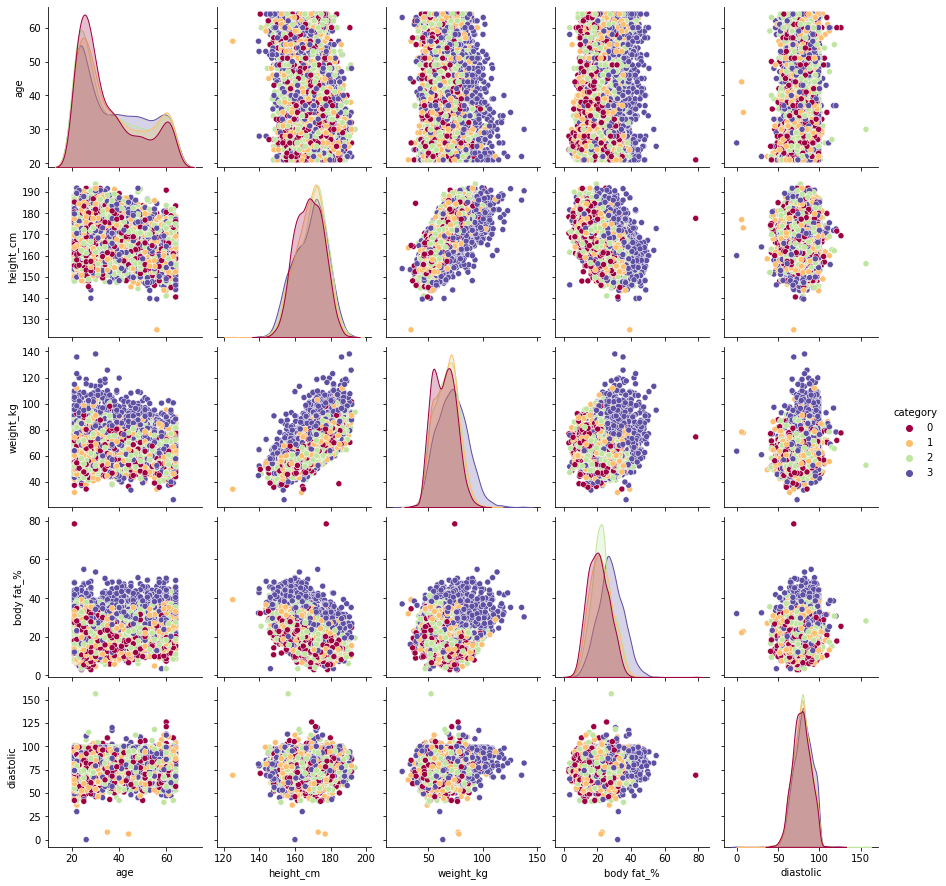

In [ ]:
sns.pairplot(cols1, hue='category', palette="Spectral")

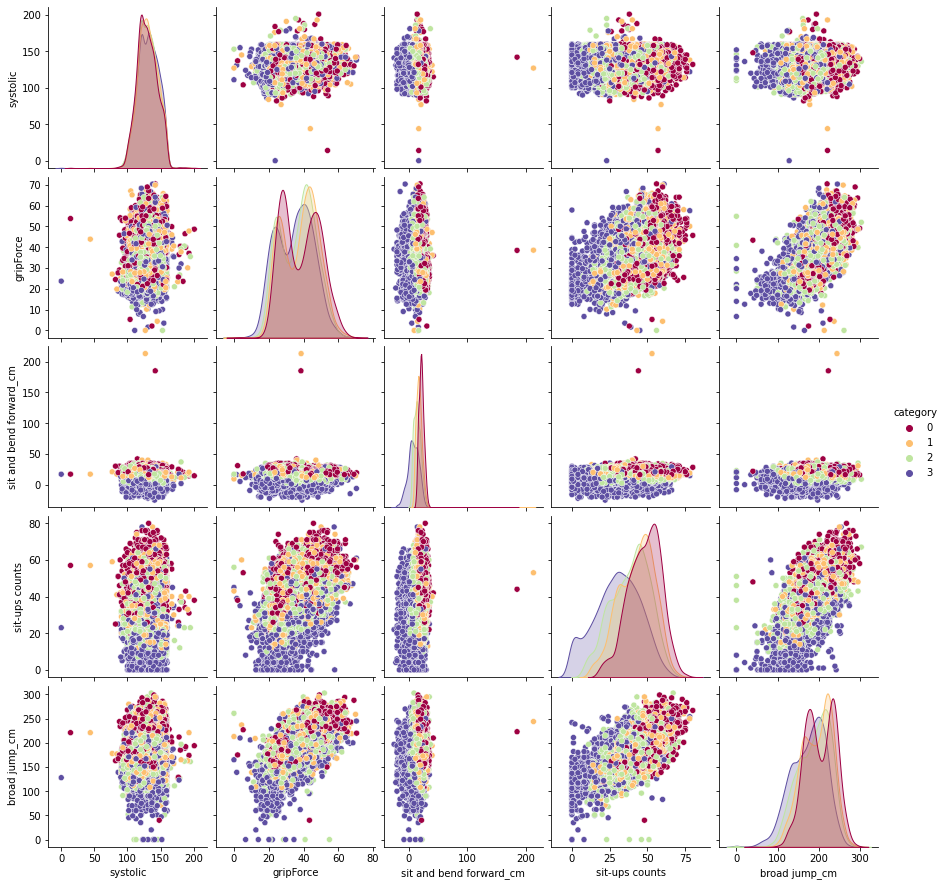

In [ ]:
sns.pairplot(cols2, hue='category', palette="Spectral")

In [ ]:
# All features
sns.pairplot(data, hue='category', palette="Spectral")

Output hidden; open in https://colab.research.google.com to view.

# Split dataset for training

In [ ]:
X = data.drop(['category'], axis = 1)
y = data['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print('-------------\nTraining Data \n-------------')
print(f'Features: {X_train.shape}')
print(f'Target:   {y_train.shape}\n')

print('-------------\nTesting Data \n-------------')
print(f'Features: {X_test.shape}')
print(f'Target:   {y_test.shape}')

-------------
Training Data 
-------------
Features: (10714, 11)
Target:   (10714,)

-------------
Testing Data 
-------------
Features: (2679, 11)
Target:   (2679,)


In [ ]:
stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)


scaler = StandardScaler(with_mean=True, with_std=True)

# Feature Selection

## Univariate Statistical Tests

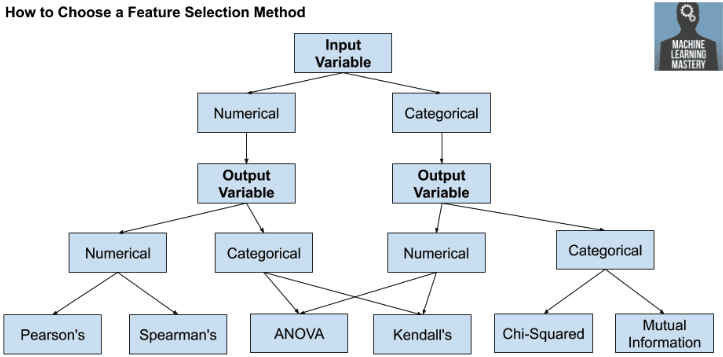

In [ ]:
#@title Input features are numerical and output (target) is categorical with label encoded. We'll choose ANOVA test for this dataset.

from IPython.display import Image
Image('FeatureSelection-Map.png')

In [ ]:
# feature extraction, select best 5 features
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(X, y)

# summarize scores
set_printoptions(precision=3)
print(f'Fit Scores: \n{fit.scores_}\n')
features = fit.transform(X)

# summarize selected features
print(features)

Fit Scores: 
[  24.246   37.899   13.271  256.561  721.188   24.469    9.68    87.496
 2475.446 1196.852  343.606]

[[ 75.24  21.3   18.4   60.   217.  ]
 [ 55.8   15.7   16.3   53.   229.  ]
 [ 78.    20.1   12.    49.   181.  ]
 ...
 [ 80.5   20.1   16.4   45.   229.  ]
 [ 57.7   40.4    9.2    0.    75.  ]
 [ 66.1   19.5    7.1   51.   180.  ]]


## Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=0.95)
X_pca = pca.fit(X)
reduced = pca.transform(X)

# summarize components
print("Explained Variance: %s" % X_pca.explained_variance_ratio_)
print(X_pca.components_)

Explained Variance: [0.69418327 0.1220711  0.05136202 0.04719113 0.02708747 0.01868245]
[[ 0.14594906  0.00797243 -0.1376708  -0.14344619  0.1123697  -0.02885023
  -0.0600467  -0.18986597 -0.00327921 -0.25745786 -0.90537063]
 [-0.37627378  0.00896162 -0.09293255 -0.29428397 -0.05392254 -0.44187711
  -0.7084643  -0.16000026  0.10924192  0.15341437  0.04408718]
 [-0.40982726  0.01309505 -0.22057972 -0.45444404 -0.03372678  0.31173433
   0.42253711 -0.23409833  0.3370925   0.3580726  -0.05650281]
 [-0.69259123 -0.00218476  0.24160166  0.49542243  0.16504976  0.06326027
   0.03327273  0.11616125 -0.24798194  0.17096806 -0.2827171 ]
 [ 0.32854012 -0.00522064  0.11217009  0.18918578 -0.1553787  -0.17649848
  -0.03081781  0.32397713  0.35720701  0.69339415 -0.27214569]
 [-0.05801008  0.01295284 -0.05743983  0.34058407  0.35408599  0.21251301
  -0.20199546 -0.00599147  0.75896061 -0.28956805  0.0769586 ]]


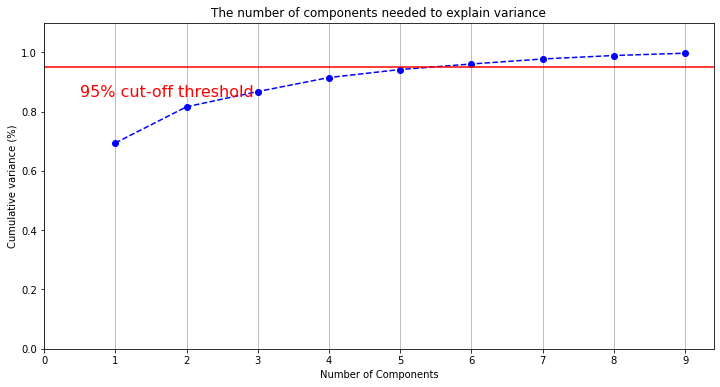

In [ ]:
import matplotlib.pyplot as plt

# scaler = MinMaxScaler()
# data_rescaled = scaler.fit_transform(data)

pca = PCA(n_components = 0.99)
pca.fit(X)
reduced = pca.transform(X)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 10, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 10, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
pca_df = pd.DataFrame(pca.components_,columns=X.columns)
pca_list = [1,2,3,4,5,6,7,8,9]
pca_df['PCA #'] = pca_list

cols_pca_df = list(pca_df.columns)
cols_pca_df = [cols_pca_df[-1]] + cols_pca_df[:-1]
pca_df = pca_df[cols_pca_df]

pca_df

,PCA #,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,1,0.145949,0.007972,-0.137671,-0.143446,0.112370,-0.028850,-0.060047,-0.189866,-0.003279,-0.257458,-0.905371
1,2,-0.376274,0.008962,-0.092933,-0.294284,-0.053923,-0.441877,-0.708464,-0.160000,0.109242,0.153414,0.044087
2,3,-0.409827,0.013095,-0.220580,-0.454444,-0.033727,0.311734,0.422537,-0.234098,0.337093,0.358073,-0.056503
3,4,-0.692591,-0.002185,0.241602,0.495422,0.165050,0.063260,0.033273,0.116161,-0.247982,0.170968,-0.282717
4,5,0.328540,-0.005221,0.112170,0.189186,-0.155379,-0.176498,-0.030818,0.323977,0.357207,0.693394,-0.272146
5,6,-0.058010,0.012953,-0.057440,0.340584,0.354086,0.212513,-0.201995,-0.005991,0.758961,-0.289568,0.076959
6,7,0.126847,-0.004256,0.001659,-0.076993,-0.046090,0.783847,-0.522064,0.045761,-0.211803,0.202501,-0.030130
7,8,-0.206975,-0.007026,0.425965,-0.230698,-0.584064,0.099577,-0.010788,0.405787,0.235408,-0.370794,-0.117105
8,9,0.121157,0.002005,0.595945,0.143534,-0.193233,0.028215,-0.004428,-0.745988,0.093073,0.077480,0.015671


In [ ]:
print(f"Percentage first component = {pca_df[0]*100}")
print(f"Percentage first and second component = {sum(pca_df[0:2])*100}")

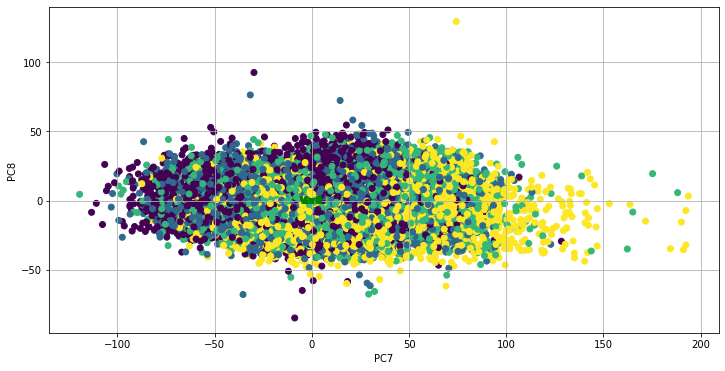

In [ ]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlabel("PC{}".format(7))
plt.ylabel("PC{}".format(8))
plt.grid()

#Call the function. 
myplot(reduced[:,0:2], pca.components_) 
plt.show()

## Feature Importance

In [ ]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)

# display the relative importance of each attribute
print(model.feature_importances_)

[0.092 0.015 0.066 0.085 0.099 0.059 0.061 0.081 0.204 0.156 0.082]


In [ ]:
print(f"{'Feature': <25}{'Importance Score': >1}")
print('-'*40)

for i in range(0,11):
  print(f'{X.columns.to_list()[i] : <25} {round(model.feature_importances_[i],4): >5}')

Feature                  Importance Score
----------------------------------------
age                       0.0917
gender                    0.0151
height_cm                 0.0657
weight_kg                 0.0847
body fat_%                0.0991
diastolic                 0.0593
systolic                  0.0607
gripForce                 0.0814
sit and bend forward_cm   0.2036
sit-ups counts            0.1564
broad jump_cm             0.0824


In [ ]:
print(model.feature_importances_)

[0.092 0.015 0.066 0.085 0.099 0.059 0.061 0.081 0.204 0.156 0.082]


In [ ]:
print(X.columns.to_list())

['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']


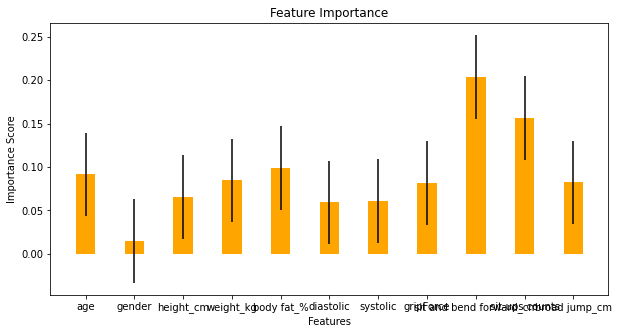

In [ ]:
feature_name = list(X.columns.to_list())
values = list(model.feature_importances_)

mean = sum(values) / len(values)
variance = sum([((x - mean) ** 2) for x in values]) / len(values)
res = variance ** 0.5

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(feature_name, values, color ='orange',
        width = 0.4, yerr=res)
 
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance")
plt.show()

# Supervised Learning Models

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

dct = DecisionTreeClassifier(criterion="gini", random_state=1234)
dct.fit(X_train,y_train)
y_pred_dct = dct.predict(X_test)
print(f"The accuracy score for Decision Tree is {(accuracy_score(y_test,y_pred_dct)*100).round(2)} %")

The accuracy score for Decision Tree is 64.84 %


In [ ]:
print(classification_report(y_test,y_pred_dct))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       638
           1       0.54      0.53      0.53       702
           2       0.59      0.59      0.59       658
           3       0.78      0.79      0.79       681

    accuracy                           0.65      2679
   macro avg       0.65      0.65      0.65      2679
weighted avg       0.65      0.65      0.65      2679



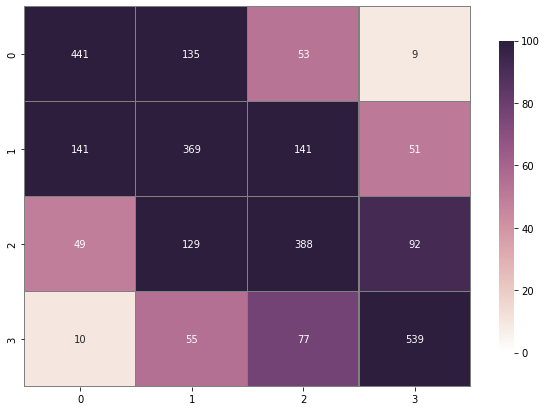

In [ ]:
import seaborn as sns

confusion_mat_dct = confusion_matrix(y_test, y_pred_dct)
df_cm = pd.DataFrame(confusion_mat_dct)

plt.figure(figsize = (10,7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, 
                  fmt='.0f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidth=0.1, linecolor='gray')

plt.show()

In [ ]:
# https://mljar.com/blog/visualize-decision-tree/
from sklearn import tree
text_representation = tree.export_text(dct)
print(text_representation)

with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,20))

plot_tree(dct, filled=True, max_depth=3)
plt.title("Decision tree trained on all the iris features")
plt.show()

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dct, 
                   feature_names=data.feature_names,  
                   class_names=data.target_names,
                   filled=True)

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(dct, out_file=None, 
                                feature_names=X.columns,  
                                class_names=data.columns[11],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
!pip install dtreeviz

In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(dct, X, y,
                target_name="category",
                feature_names=X.columns,
                class_names=list(np.unique(y)))

viz

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000,
                            max_depth=None,
                            max_features='auto',
                            min_samples_leaf=4,
                            bootstrap=True,
                            n_jobs=1,
                            random_state=0)

rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(f"The accuracy score for Random Forest is {(accuracy_score(y_test,y_pred_rf)*100).round(2)} %")

The accuracy score for Random Forest is 73.72 %


In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       638
           1       0.63      0.63      0.63       702
           2       0.73      0.66      0.69       658
           3       0.89      0.81      0.85       681

    accuracy                           0.74      2679
   macro avg       0.74      0.74      0.74      2679
weighted avg       0.74      0.74      0.74      2679



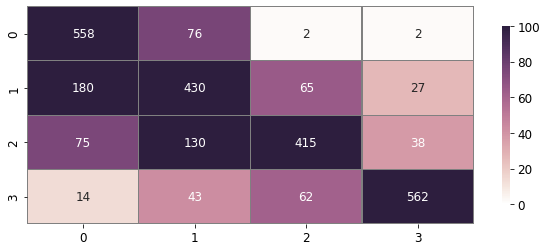

In [ ]:
import seaborn as sns

confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
df_cm = pd.DataFrame(confusion_mat_rf)

plt.figure(figsize = (10,4))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, 
                  fmt='.0f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidth=0.1, linecolor='gray')

plt.show()

## k-Nearest Neighbors (kNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
knn_model.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_score(y_test,y_pred_knn)
print(f"The accuracy score for k-Nearest Neighbors is {(accuracy_score(y_test,y_pred_knn)*100).round(2)} %")

The accuracy score for k-Nearest Neighbors is 56.92 %


In [ ]:
from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

param_grid = {'n_neighbors': range(1,20)}
clf = GridSearchCV(KNeighborsClassifier(), param_grid)
clf.fit(X_train,y_train)
clf_pred = clf.predict(X_test)

In [ ]:
### Determining the number of neighbors using RandomizedSearchCV
param_grid = {'n_neighbors': range(1,20)}
knn = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=3)
knn.fit(X_train,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.503 total time=   0.2s
[CV 2/5] END .....................n_neighbors=1;, score=0.512 total time=   0.2s
[CV 3/5] END .....................n_neighbors=1;, score=0.521 total time=   0.2s
[CV 4/5] END .....................n_neighbors=1;, score=0.517 total time=   0.2s
[CV 5/5] END .....................n_neighbors=1;, score=0.525 total time=   0.1s
[CV 1/5] END .....................n_neighbors=2;, score=0.508 total time=   0.2s
[CV 2/5] END .....................n_neighbors=2;, score=0.506 total time=   0.2s
[CV 3/5] END .....................n_neighbors=2;, score=0.521 total time=   0.2s
[CV 4/5] END .....................n_neighbors=2;, score=0.514 total time=   0.2s
[CV 5/5] END .....................n_neighbors=2;, score=0.510 total time=   0.2s
[CV 1/5] END .....................n_neighbors=3;, score=0.531 total time=   0.2s
[CV 2/5] END .....................n_neighbors=3;

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, verbose=3)

In [ ]:
knn.best_params_ # best parameter

{'n_neighbors': 18}

In [ ]:
knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[528  93  17   0]
 [276 285 125  16]
 [106 178 338  36]
 [ 21  82 170 408]]


              precision    recall  f1-score   support

           0       0.57      0.83      0.67       638
           1       0.45      0.41      0.43       702
           2       0.52      0.51      0.52       658
           3       0.89      0.60      0.72       681

    accuracy                           0.58      2679
   macro avg       0.61      0.59      0.58      2679
weighted avg       0.61      0.58      0.58      2679



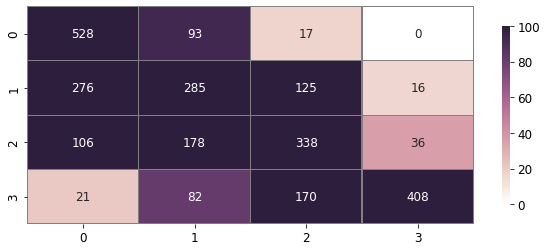

In [ ]:
import seaborn as sns

confusion_mat_rf = confusion_matrix(y_test, knn_pred)
df_cm = pd.DataFrame(confusion_mat_rf)

plt.figure(figsize = (10,4))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, 
                  fmt='.0f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidth=0.1, linecolor='gray')

plt.show()

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_score(y_test,y_pred_nb)
print(f"The accuracy score for Naive Bayes is {(accuracy_score(y_test,y_pred_nb)*100).round(2)} %")

The accuracy score for Naive Bayes is 53.98 %


In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.54      0.75      0.63       638
           1       0.41      0.27      0.33       702
           2       0.49      0.45      0.47       658
           3       0.67      0.71      0.69       681

    accuracy                           0.54      2679
   macro avg       0.53      0.54      0.53      2679
weighted avg       0.53      0.54      0.52      2679



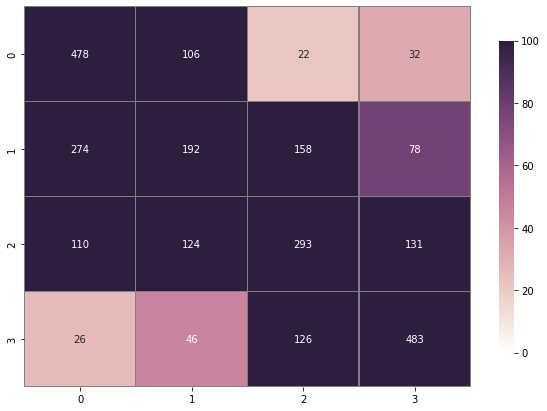

In [ ]:
import seaborn as sns

confusion_mat_rf = confusion_matrix(y_test, y_pred_nb)
df_cm = pd.DataFrame(confusion_mat_rf)

plt.figure(figsize = (10,7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, 
                  fmt='.0f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidth=0.1, linecolor='gray')

plt.show()

## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
y_pred_svc = svc_model.predict(X_test)
accuracy_score(y_test,y_pred_svc)
print(f"The accuracy score for SVM is {(accuracy_score(y_test,y_pred_svc)*100).round(2)} %")

The accuracy score for SVM is 63.79 %


In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.64      0.78      0.71       638
           1       0.49      0.47      0.48       702
           2       0.58      0.58      0.58       658
           3       0.86      0.73      0.79       681

    accuracy                           0.64      2679
   macro avg       0.64      0.64      0.64      2679
weighted avg       0.64      0.64      0.64      2679



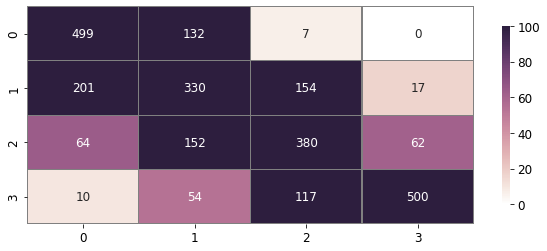

In [ ]:
import seaborn as sns

confusion_mat_rf = confusion_matrix(y_test, y_pred_svc)
df_cm = pd.DataFrame(confusion_mat_rf)

plt.figure(figsize = (10,4))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, 
                  fmt='.0f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidth=0.1, linecolor='gray')

plt.show()

## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier

adabc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=200)
adabc.fit(X_train,y_train)
adabc_pred = adabc.predict(X_test)

print(classification_report(y_test,adabc_pred))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       638
           1       0.48      0.60      0.53       702
           2       0.52      0.49      0.51       658
           3       0.80      0.67      0.73       681

    accuracy                           0.61      2679
   macro avg       0.63      0.61      0.62      2679
weighted avg       0.63      0.61      0.61      2679



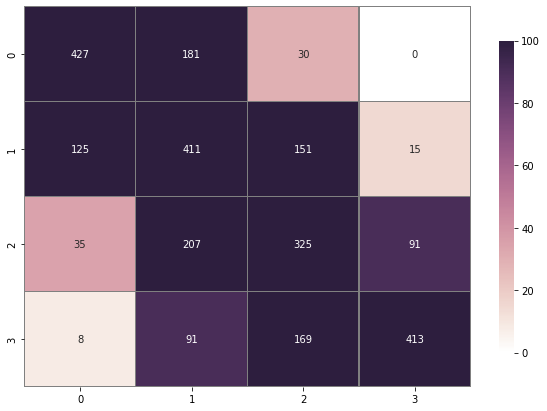

In [ ]:
import seaborn as sns

confusion_mat_rf = confusion_matrix(y_test, adabc_pred)
df_cm = pd.DataFrame(confusion_mat_rf)

plt.figure(figsize = (10,7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, 
                  fmt='.0f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidth=0.1, linecolor='gray')

plt.show()

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier

bgc = BaggingClassifier(DecisionTreeClassifier(),n_estimators=200)
bgc.fit(X_train,y_train)
bgc_pred = bgc.predict(X_test)

print(confusion_matrix(y_test,bgc_pred))
print('\n')
print(classification_report(y_test,bgc_pred))

[[561  67  10   0]
 [167 446  69  20]
 [ 57 135 432  34]
 [ 10  44  70 557]]


              precision    recall  f1-score   support

           0       0.71      0.88      0.78       638
           1       0.64      0.64      0.64       702
           2       0.74      0.66      0.70       658
           3       0.91      0.82      0.86       681

    accuracy                           0.75      2679
   macro avg       0.75      0.75      0.75      2679
weighted avg       0.75      0.75      0.74      2679



## XGBoost

In [ ]:
!pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 34 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# fit model no training data
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

print(xgb_model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)


In [ ]:
# make predictions for test data
y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.85%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       638
           1       0.67      0.63      0.65       702
           2       0.75      0.70      0.73       658
           3       0.91      0.83      0.87       681

    accuracy                           0.76      2679
   macro avg       0.76      0.76      0.76      2679
weighted avg       0.76      0.76      0.76      2679



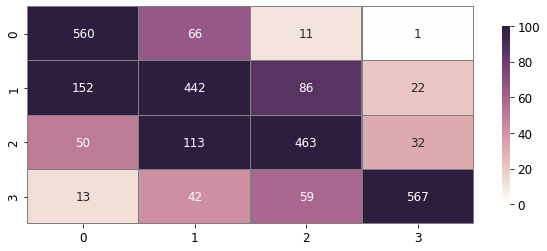

In [ ]:
import seaborn as sns

confusion_mat_rf = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion_mat_rf)

plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (10,4))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, 
                  fmt='.0f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidth=0.1, linecolor='gray')

plt.show()

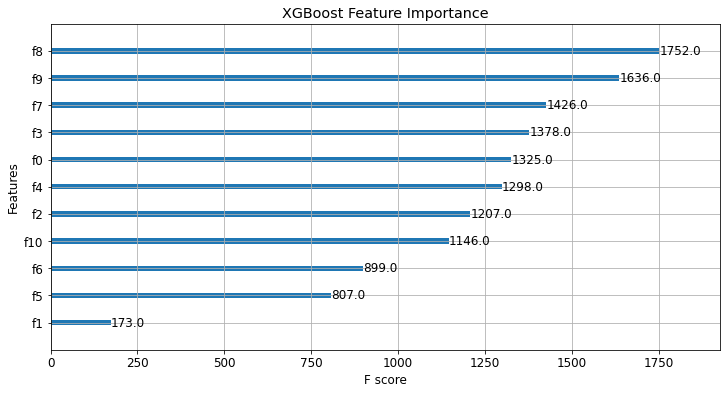

In [ ]:
plt.rcParams.update({'font.size': 12})
features = X.columns.to_list()
xgb.plot_importance(xgb_model, grid=True)
plt.title("XGBoost Feature Importance")

plt.show()

In [ ]:
!pip install shap

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


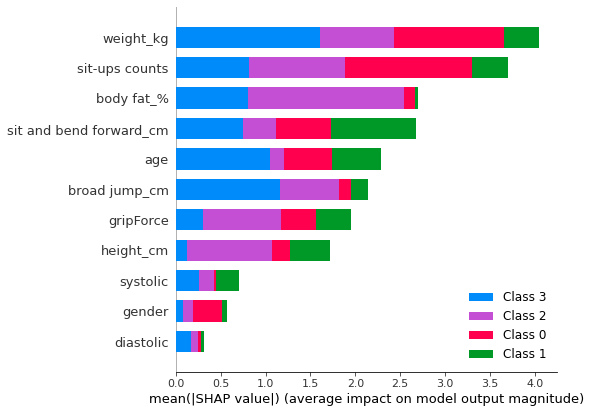

In [ ]:
import shap

# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)



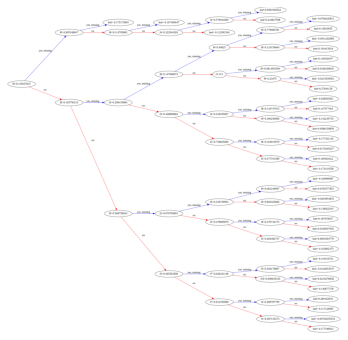

In [ ]:
# plot decision tree
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

# plot single tree
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 32})
plot_tree(xgb_model, num_trees=10, rankdir='LR')
plt.show()

In [ ]:
import xgboost as xgb
import os

gvz = xgb.to_graphviz(xgb_model, num_trees=0, rankdir='LR')


filename = 'xgb_tree.png'
_, file_extension = os.path.splitext(filename)
format = file_extension.strip('.').lower()
data = gvz.pipe(format=format)
full_filename = filename
with open(full_filename, 'wb') as f:
    f.write(data)

## Neural Network Classification

In [ ]:
# Implement your code here
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from tensorflow.keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

model.add(Dense(units=512, input_shape=[X_train.shape[1]], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=4, activation='sigmoid'))

# Compile model
sgd = SGD(learning_rate=0.01)
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               6144      
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 4)                 516       
                                                                 
Total params: 170,884
Trainable params: 170,884
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(model.layers)

4

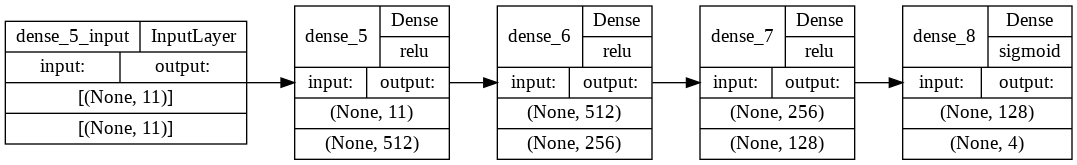

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png'
, show_shapes=True, 
           show_layer_names=True, rankdir='LR'
, show_layer_activations=True)

In [ ]:
# Fit the model
history = model.fit(
    X_train, 
    y_train, 
    batch_size = 256,
    epochs = 200, 
    verbose=1, 
    validation_data=(X_test, y_test)
)

Epoch 1/200
42/42 [==============================] - 1s 17ms/step - loss: 1.2294 - accuracy: 0.4458 - val_loss: 1.0726 - val_accuracy: 0.4946
Epoch 2/200
42/42 [==============================] - 1s 12ms/step - loss: 1.0196 - accuracy: 0.5427 - val_loss: 1.0019 - val_accuracy: 0.5610
Epoch 3/200
42/42 [==============================] - 1s 13ms/step - loss: 0.9808 - accuracy: 0.5540 - val_loss: 0.9787 - val_accuracy: 0.5603
Epoch 4/200
42/42 [==============================] - 0s 12ms/step - loss: 0.9397 - accuracy: 0.5805 - val_loss: 0.9432 - val_accuracy: 0.5599
Epoch 5/200
42/42 [==============================] - 1s 12ms/step - loss: 0.9211 - accuracy: 0.5869 - val_loss: 0.9275 - val_accuracy: 0.5786
Epoch 6/200
42/42 [==============================] - 1s 12ms/step - loss: 0.8993 - accuracy: 0.6028 - val_loss: 0.8818 - val_accuracy: 0.6051
Epoch 7/200
42/42 [==============================] - 1s 12ms/step - loss: 0.8810 - accuracy: 0.6115 - val_loss: 0.8671 - val_accuracy: 0.6110
Epoch 

Loss after final iteration:  0.6551517248153687
Training loss after final iteration:  0.5770643353462219


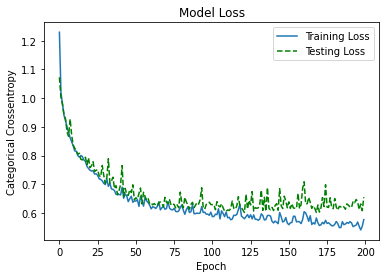

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

print("Loss after final iteration: ", history.history['val_loss'][-1])
print("Training loss after final iteration: ", history.history['loss'][-1])

fig = plt.figure(figsize=(6,4))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Model Loss')

plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()

<BarContainer object of 11 artists>

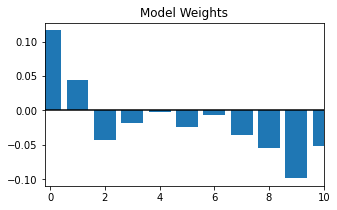

In [ ]:
fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.plot([-0.2,10],[0,0],color='k')
plt.xlim([-0.2,10])
plt.title('Model Weights')

Temp=model.get_weights()[0].T
plt.bar(range(len(Temp[0])),Temp[0])

In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

def ohe_to_classes(y):
    '''
        converts one hot encoding to classes
        y: a list of one-hot-encoded classes of data points
    '''
    return [np.argmax(v) for v in y]


predicted_all1 = model.predict(np.array(X_test))
predicted_all = np.argmax(predicted_all1, axis=1)
print("predicted classes: {}".format(predicted_all))


print('accuracy', accuracy_score(predicted_all, y_test))

predicted classes: [1 2 2 ... 0 0 0]
accuracy 0.7260171705860395


In [ ]:
confusion_mat = confusion_matrix(predicted_all, y_test)
print("confusion matrix\n{}\n\n".format(confusion_mat))
print(classification_report(predicted_all,y_test))

confusion matrix
[[604 251  60  14]
 [ 30 382 152  44]
 [  4  55 428  92]
 [  0  14  18 531]]


              precision    recall  f1-score   support

           0       0.95      0.65      0.77       929
           1       0.54      0.63      0.58       608
           2       0.65      0.74      0.69       579
           3       0.78      0.94      0.85       563

    accuracy                           0.73      2679
   macro avg       0.73      0.74      0.72      2679
weighted avg       0.76      0.73      0.73      2679



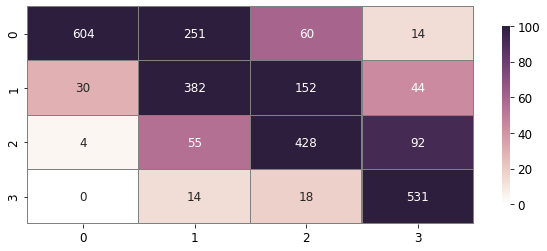

In [ ]:
import seaborn as sns

df_cm = pd.DataFrame(confusion_mat)


plt.figure(figsize = (10,4))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, 
                  fmt='.0f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidth=0.1, linecolor='gray')

# for t in res.texts: 
#   t.set_text(t.get_text() + " %")

plt.show()

LR 0.586148617042705
CART 0.626189711634377
KNN 0.5588955146435414
NB 0.5414415239347199
LDA 0.6104167587829837
SVM 0.6291762924951517
[array([0.58986562, 0.58555027, 0.58302996]), array([0.62961926, 0.61719406, 0.63175581]), array([0.55235162, 0.56762812, 0.5567068 ]), array([0.53695409, 0.54130496, 0.54606553]), array([0.60526316, 0.60795295, 0.61803416]), array([0.6343785 , 0.62587511, 0.62727527])]


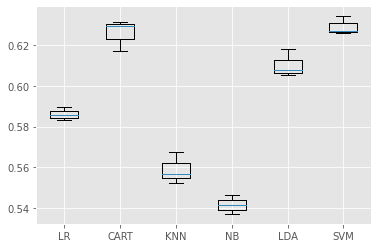

In [ ]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
plt.style.use('ggplot')

# Building Models for iris flower classification

np.random.seed(1000)
# making a list of ml classification models
models = []

def classification_Models(xtrain,xtest, ytrain, ytest ):
    

    
    models.append( ('LR',  LogisticRegression()) )
    models.append( ('CART', DecisionTreeClassifier()) )
    models.append( ('KNN', KNeighborsClassifier()) )
    models.append( ('NB',  GaussianNB()) )
    models.append( ('LDA',  LinearDiscriminantAnalysis()) )
    models.append( ('SVM',  SVC()) )

    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, xtrain, ytrain, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(X_train, X_test, y_train, y_test)

# Unsupervised Learning

In [20]:
# Preprocessing packages
import numpy as np 
from numpy import set_printoptions
import pandas as pd 

# Data Viz packages
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn preprocessing and metrics packages
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

# Data from: https://www.kaggle.com/datasets/kukuroo3/body-performance-data
data = pd.read_csv('BodyPerformance.csv')

data["category"] = data["class"].copy()
data = data.drop(columns='class')

le = LabelEncoder()
data.category = le.fit_transform(data.category)
data = data.replace({'gender':{'M':0 , 'F':1}})

data_standardized = preprocessing.scale(data)
data_standardized = pd.DataFrame(data_standardized)

# rename new dataframe columns
data_standardized = data_standardized.set_axis(data.columns, axis=1, inplace=False)
data_standardized = data_standardized.drop(columns='category')
data_standardized.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,-0.717432,-0.76275,0.443873,0.652150,-0.267367,0.112009,-0.015959,1.688190,0.377317,1.416961,0.674009
1,-0.864220,-0.76275,-0.422465,-0.974734,-1.039081,-0.167278,-0.287820,-0.053073,0.128984,0.926634,0.975013
2,-0.423857,-0.76275,1.310211,0.883127,-0.432734,1.229158,1.479276,0.737554,-0.379509,0.646446,-0.229005
3,-0.350463,-0.76275,0.704961,0.305684,-0.667004,-0.260374,1.139450,0.417538,-0.001096,0.926634,0.724176
4,-0.644038,-0.76275,0.621888,0.021147,-0.846152,-0.818948,-0.219855,0.615195,1.406129,0.366259,0.674009


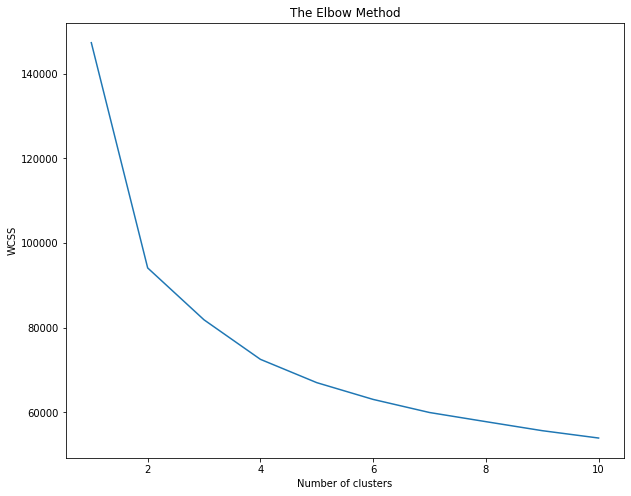

In [21]:
# find the appropriate cluster number
from sklearn.cluster import KMeans

plt.figure(figsize=(10, 8))

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_standardized)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_standardized)

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1
data['cluster'] = cluster

#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,category
cluster,,,,,,,,,,,,
1,29.5,0.0,173.4,70.5,17.2,72.1,123.2,43.5,14.2,50.2,222.3,1.4
2,28.8,1.0,162.4,56.0,26.2,73.6,119.8,27.0,20.7,38.6,167.9,1.0
3,52.1,1.0,157.5,58.3,32.1,78.6,130.3,23.9,16.0,18.6,130.2,2.0
4,50.2,0.0,170.4,72.8,24.1,84.6,138.4,39.5,9.0,33.0,185.3,2.0
5,30.7,0.0,175.9,78.0,19.9,86.9,142.0,47.2,15.5,50.1,224.2,1.4


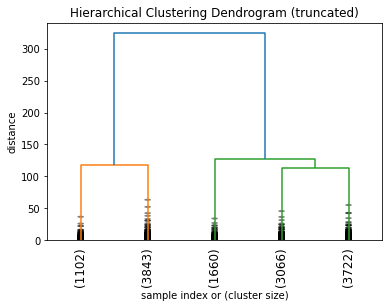

In [23]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Hierarchical clustering for the same dataset
# creating a dataset for hierarchical clustering
dataset2_standardized = data_standardized


# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

#creating the linkage matrix
H_cluster = linkage(dataset2_standardized,'ward')

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()



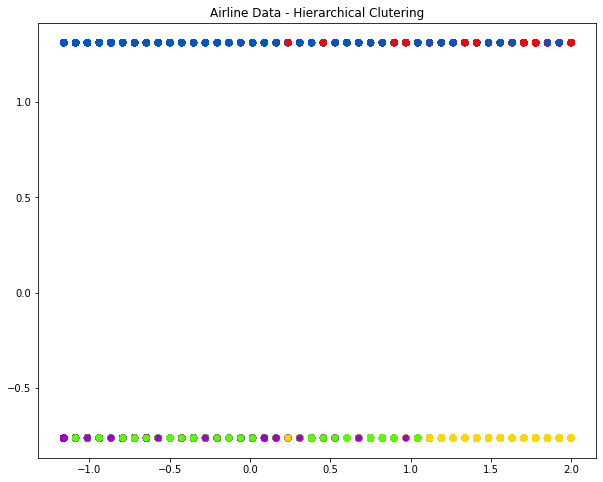

In [24]:
# Assigning the clusters and plotting the observations as per hierarchical clustering
from scipy.cluster.hierarchy import fcluster
k=5
cluster_2 = fcluster(H_cluster, k, criterion='maxclust')
cluster_2[0:30:,]
plt.figure(figsize=(10, 8))
plt.scatter(dataset2_standardized.iloc[:,0], dataset2_standardized.iloc[:,1],c=cluster_2, cmap='prism')  # plot points with cluster dependent colors
plt.title('Airline Data - Hierarchical Clutering')
plt.show()